<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Preprocessing
</div>

<h2> Import thư viện cần thiết </h2>

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

<h2>Đọc dữ liệu từ file <font color="blue">"steam_game.csv" </font></h2>


In [2]:
df = pd.read_csv('../data/steam_game.csv')
df.head(10)

,Title,Genre,Tags,withDLC,isMature,Franchise,ReleaseDate,Developer,Publisher,Languages,PositiveReviews,TotalReviews,NegativeReviews,OriginalPrice,DiscountPercent
0,Baldur's Gate 3,"Adventure, RPG, Strategy","RPG, Choices Matter, Story Rich, Character Cus...",True,True,Baldur's Gate,"3 Aug, 2023",Larian Studios,Larian Studios,"English, French, German, Spanish - Spain, Poli...","(491,707)","(508,265)","(16,558)","990.000,00₫",-10%
1,Counter-Strike 2,"Action, Free to Play","FPS, Shooter, Multiplayer, Competitive, Action...",True,True,NaN,"21 Aug, 2012",Valve,Valve,"English, Czech, Danish, Dutch, Finnish, French...","(6,840,193)","(7,802,330)","(962,137)",Free,NaN
2,Lethal Company,"Action, Adventure, Indie, Early Access","Online Co-Op, Horror, First-Person, Psychologi...",False,True,NaN,"23 Oct, 2023",Zeekerss,Zeekerss,English,"(200,445)","(204,086)","(3,641)","142.000,00₫",NaN
3,Cyberpunk 2077,RPG,"Cyberpunk, Open World, Nudity, RPG, Singleplay...",True,True,NaN,"9 Dec, 2020",CD PROJEKT RED,CD PROJEKT RED,"English, French, Italian, German, Spanish - Sp...","(561,816)","(695,253)","(133,437)","990.000,00₫",-50%
4,ELDEN RING,"Action, RPG","Souls-like, Dark Fantasy, Open World, RPG, Dif...",False,True,Bandai Namco Entertainment,"24 Feb, 2022",FromSoftware Inc.,FromSoftware Inc.,"English, French, Italian, German, Spanish - Sp...","(684,531)","(741,142)","(56,611)","898.000,00₫",-40%
5,Dota 2,"Action, Strategy, Free to Play","Free to Play, MOBA, Multiplayer, Strategy, eSp...",True,False,Dota,"9 Jul, 2013",Valve,Valve,"English, Bulgarian, Czech, Danish, Dutch, Finn...","(1,756,309)","(2,139,411)","(383,102)",Free,NaN
6,Red Dead Redemption 2,"Action, Adventure","Open World, Story Rich, Western, Adventure, Mu...",False,True,Red Dead Redemption,"5 Dec, 2019",Rockstar Games,Rockstar Games,"English, French, Italian, German, Spanish - Sp...","(460,828)","(505,935)","(45,107)","1.000.000,00₫",-67%
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"495.000,00₫",-15%
8,Remnant II,"Action, Adventure, RPG","Souls-like, Action, Adventure, RPG, Co-op, Thi...",True,True,NaN,"25 Jul, 2023",Gunfire Games,Gearbox Publishing,"English, French, Italian, German, Spanish - Sp...","(36,863)","(43,504)","(6,641)","830.000,00₫",-40%
9,It Takes Two,"Action, Adventure","Co-op, Multiplayer, Split Screen, Local Co-Op,...",False,False,EA Originals,"25 Mar, 2021",Hazelight,Electronic Arts,"English, French, Italian, German, Spanish - Sp...","(138,567)","(145,456)","(6,889)","790.000,00₫",-75%


<h2>Ta xem xét có tổng cộng bao nhiêu hàng và cột thuộc tính ở tập dữ liệu thô </h2>
Nếu dữ liệu có trên 1000 dòng và phải có trên 5 cột thuộc tính thì dữ liệu mới đủ để tiến hành các bước khai thác, xây dựng mô hình học máy, học sâu, ... 

Ngược lại, dữ liệu quá ít, không đủ -> cần thu thập thêm dữ liệu

In [3]:
num_rows, num_cols = df.shape
print(f'Current shape of data: {df.shape}')
if (num_rows > 100) & (num_cols > 5):
    print('Data is good !')
else:
    print('You should collect more data')

Current shape of data: (9521, 15)
Data is good !


### Ta xem xét ý nghĩa của từng cột dữ liệu
1. Title: Tên trò chơi điện tử trên website steam
2. Genre: Thể loại trò chơi
3. Tags: các nhãn trò chơi mà người dùng(người chơi) gắn cho trò chơi
4. withDLC: trò chơi có kèm theo các downloadable content hay không ?	
5. isMature: trò chơi có được gán nhãn không phù hợp cho trẻ nhỏ hay không?
6. Franchise: tên thương hiệu của trò chơi	
7. ReleaseDate: Ngày phát hành của trò chơi	
8. Developer: Nhà phát triển trò chơi	
9. Publisher: Nhà phát hành trò chơi
10. Languages: Các ngôn ngữ được hỗ trợ trong trò chơi	
11. PositiveReviews: Số đánh giá tích cực về trò chơi	
12. TotalReviews: Tổng số đánh giá của người chơi về trò chơi
13. NegativeReviews: Số đánh giá tiêu cực về trò chơi
14. OriginalPrice: Giá bán gốc của trò chơi
15. DiscountPercent: Giảm giá áp dụng trên giá gốc(%)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9521 entries, 0 to 9520
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            6730 non-null   object
 1   Genre            6718 non-null   object
 2   Tags             6730 non-null   object
 3   withDLC          7195 non-null   object
 4   isMature         7195 non-null   object
 5   Franchise        3402 non-null   object
 6   ReleaseDate      6724 non-null   object
 7   Developer        6726 non-null   object
 8   Publisher        6714 non-null   object
 9   Languages        6729 non-null   object
 10  PositiveReviews  6719 non-null   object
 11  TotalReviews     6719 non-null   object
 12  NegativeReviews  6719 non-null   object
 13  OriginalPrice    9521 non-null   object
 14  DiscountPercent  8110 non-null   object
dtypes: object(15)
memory usage: 1.1+ MB


Kiểm tra xem mỗi feature chiếm nhiêu % missing value:

In [5]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

Title              29.314148
Genre              29.440185
Tags               29.314148
withDLC            24.430207
isMature           24.430207
Franchise          64.268459
ReleaseDate        29.377166
Developer          29.356160
Publisher          29.482197
Languages          29.324651
PositiveReviews    29.429682
TotalReviews       29.429682
NegativeReviews    29.429682
OriginalPrice       0.000000
DiscountPercent    14.819872
dtype: float64

##### Loại bỏ những dòng dữ liệu có *"Title"* là Nan value

In [6]:
df.dropna(subset = ['Title'], inplace = True)
df

,Title,Genre,Tags,withDLC,isMature,Franchise,ReleaseDate,Developer,Publisher,Languages,PositiveReviews,TotalReviews,NegativeReviews,OriginalPrice,DiscountPercent
0,Baldur's Gate 3,"Adventure, RPG, Strategy","RPG, Choices Matter, Story Rich, Character Cus...",True,True,Baldur's Gate,"3 Aug, 2023",Larian Studios,Larian Studios,"English, French, German, Spanish - Spain, Poli...","(491,707)","(508,265)","(16,558)","990.000,00₫",-10%
1,Counter-Strike 2,"Action, Free to Play","FPS, Shooter, Multiplayer, Competitive, Action...",True,True,NaN,"21 Aug, 2012",Valve,Valve,"English, Czech, Danish, Dutch, Finnish, French...","(6,840,193)","(7,802,330)","(962,137)",Free,NaN
2,Lethal Company,"Action, Adventure, Indie, Early Access","Online Co-Op, Horror, First-Person, Psychologi...",False,True,NaN,"23 Oct, 2023",Zeekerss,Zeekerss,English,"(200,445)","(204,086)","(3,641)","142.000,00₫",NaN
3,Cyberpunk 2077,RPG,"Cyberpunk, Open World, Nudity, RPG, Singleplay...",True,True,NaN,"9 Dec, 2020",CD PROJEKT RED,CD PROJEKT RED,"English, French, Italian, German, Spanish - Sp...","(561,816)","(695,253)","(133,437)","990.000,00₫",-50%
4,ELDEN RING,"Action, RPG","Souls-like, Dark Fantasy, Open World, RPG, Dif...",False,True,Bandai Namco Entertainment,"24 Feb, 2022",FromSoftware Inc.,FromSoftware Inc.,"English, French, Italian, German, Spanish - Sp...","(684,531)","(741,142)","(56,611)","898.000,00₫",-40%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9510,G-senjou no Maou - The Devil on G-String,"Adventure, Casual, Simulation","Visual Novel, Story Rich, Anime, Mystery, Nudi...",True,True,NaN,"5 Nov, 2015",AKABEiSOFT2,Sekai Project,"English, Japanese",593,639,46,"260.000,00₫",-50%
9513,Midnight Girl,"Adventure, Casual, Indie","Casual, Adventure, Point & Click, Puzzle, Mini...",False,False,NaN,"6 Oct, 2023",Italic,Italic,English,68,72,4,"205.000,00₫",-15%
9515,Cantata,"Indie, Simulation, Strategy","Strategy, Sandbox, Pixel Graphics, Management,...",True,False,NaN,"15 Aug, 2023",Afterschool Studio,Modern Wolf,English,89,117,28,"220.000,00₫",-20%
9517,AER Memories of Old,"Adventure, Indie","Adventure, Exploration, Indie, Relaxing, Open ...",True,False,NaN,"25 Oct, 2017",Forgotten Key,Daedalic Entertainment,"English, German, Spanish - Spain, French, Japa...","(5,784)","(6,717)",933,"165.000,00₫",-90%


In [7]:
if df['Title'].isna().sum() == 0:
    print('Column Title is now good !')

Column Title is now good !


##### Có thể thấy số giá bị thiếu ở cột *DiscountPercent* là quá nhiều (hơn 90%) nên ta sẽ tính lại giá trị ở cột *OriginalPrice* sau khi đã áp dụng giảm giá, đổi tên thành *Price* và xóa đi cột *DiscountPercent* 

##### Trước hết, ta sẽ chuyển tất cả giá trị với đơn vị tiền tệ "$" sang "VND", tiến hàng loại bỏ kí tự hiển thị đơn vị tiền tệ, đưa giá trị "Free" thành 0 ở cột *OriginalPrice*

In [8]:
def convert_price(price):
    if price == "Free":
        return 0.0
    elif '₫' in price:
        formatted_price = float(price[: -4].replace('₫', '').replace('.', '').replace(',', ''))
        return round(formatted_price, 2)
    elif '$' in price:
        usd_to_vnd = 24265
        formatted_price =  float(price.replace('$', '')) * usd_to_vnd
        return round(formatted_price, 2)

df['OriginalPrice'] = df['OriginalPrice'].apply(convert_price) 

In [9]:
# for price in df['OriginalPrice']:
#     print(price)

In [10]:
def convert_discount(discount):
    if pd.isna(discount):
        return 0
    else:
        return float(discount.replace('-', '').replace('%', '')) * 0.01

df['DiscountPercent'] = df['DiscountPercent'].apply(convert_discount)

In [11]:
# for discount in df['DiscountPercent']:
#     print(discount)

In [12]:
def price_after_discount(x):
    discount_percent = x['DiscountPercent']
    if pd.isna(discount_percent):
        return x['OriginalPrice']
    else:
        return x['OriginalPrice'] * (1 - discount_percent)

df['DiscountedPrice'] = df.apply(price_after_discount, axis = 1)

In [13]:
df['DiscountedPrice']

0       891000.0
1            0.0
2       142000.0
3       495000.0
4       538800.0
          ...   
9510    130000.0
9513    174250.0
9515    176000.0
9517     16500.0
9520     78000.0
Name: DiscountedPrice, Length: 6730, dtype: float64

In [14]:
df.head(20)

,Title,Genre,Tags,withDLC,isMature,Franchise,ReleaseDate,Developer,Publisher,Languages,PositiveReviews,TotalReviews,NegativeReviews,OriginalPrice,DiscountPercent,DiscountedPrice
0,Baldur's Gate 3,"Adventure, RPG, Strategy","RPG, Choices Matter, Story Rich, Character Cus...",True,True,Baldur's Gate,"3 Aug, 2023",Larian Studios,Larian Studios,"English, French, German, Spanish - Spain, Poli...","(491,707)","(508,265)","(16,558)",990000.0,0.10,891000.0
1,Counter-Strike 2,"Action, Free to Play","FPS, Shooter, Multiplayer, Competitive, Action...",True,True,NaN,"21 Aug, 2012",Valve,Valve,"English, Czech, Danish, Dutch, Finnish, French...","(6,840,193)","(7,802,330)","(962,137)",0.0,0.00,0.0
2,Lethal Company,"Action, Adventure, Indie, Early Access","Online Co-Op, Horror, First-Person, Psychologi...",False,True,NaN,"23 Oct, 2023",Zeekerss,Zeekerss,English,"(200,445)","(204,086)","(3,641)",142000.0,0.00,142000.0
3,Cyberpunk 2077,RPG,"Cyberpunk, Open World, Nudity, RPG, Singleplay...",True,True,NaN,"9 Dec, 2020",CD PROJEKT RED,CD PROJEKT RED,"English, French, Italian, German, Spanish - Sp...","(561,816)","(695,253)","(133,437)",990000.0,0.50,495000.0
4,ELDEN RING,"Action, RPG","Souls-like, Dark Fantasy, Open World, RPG, Dif...",False,True,Bandai Namco Entertainment,"24 Feb, 2022",FromSoftware Inc.,FromSoftware Inc.,"English, French, Italian, German, Spanish - Sp...","(684,531)","(741,142)","(56,611)",898000.0,0.40,538800.0
5,Dota 2,"Action, Strategy, Free to Play","Free to Play, MOBA, Multiplayer, Strategy, eSp...",True,False,Dota,"9 Jul, 2013",Valve,Valve,"English, Bulgarian, Czech, Danish, Dutch, Finn...","(1,756,309)","(2,139,411)","(383,102)",0.0,0.00,0.0
6,Red Dead Redemption 2,"Action, Adventure","Open World, Story Rich, Western, Adventure, Mu...",False,True,Red Dead Redemption,"5 Dec, 2019",Rockstar Games,Rockstar Games,"English, French, Italian, German, Spanish - Sp...","(460,828)","(505,935)","(45,107)",1000000.0,0.67,330000.0
8,Remnant II,"Action, Adventure, RPG","Souls-like, Action, Adventure, RPG, Co-op, Thi...",True,True,NaN,"25 Jul, 2023",Gunfire Games,Gearbox Publishing,"English, French, Italian, German, Spanish - Sp...","(36,863)","(43,504)","(6,641)",830000.0,0.40,498000.0
9,It Takes Two,"Action, Adventure","Co-op, Multiplayer, Split Screen, Local Co-Op,...",False,False,EA Originals,"25 Mar, 2021",Hazelight,Electronic Arts,"English, French, Italian, German, Spanish - Sp...","(138,567)","(145,456)","(6,889)",790000.0,0.75,197500.0
10,Tom Clancy's Rainbow Six® Siege,Action,"FPS, PvP, eSports, Multiplayer, Tactical, Shoo...",True,False,Rainbow 6 Franchise,"1 Dec, 2015",Ubisoft Montreal,Ubisoft,"English, French, Italian, German, Spanish - Sp...","(1,037,821)","(1,209,309)","(171,488)",330000.0,0.60,132000.0


#### Vì cột Franchise chứa quá nhiều dữ liệu bị thiếu (hơn 50%), nhưng lại không thể "fill" giá trị ngẫu nhiêu nào, hay có giá trị đặc thù nào có thể thay thế những dữ liệu bị thiếu mà không gây nhiễu

Nên ta chọn loại bỏ hẳn cột này ra khỏi dataframe

In [15]:
df.drop(columns = ['Franchise'], inplace = True)

In [16]:
df.head(15)

,Title,Genre,Tags,withDLC,isMature,ReleaseDate,Developer,Publisher,Languages,PositiveReviews,TotalReviews,NegativeReviews,OriginalPrice,DiscountPercent,DiscountedPrice
0,Baldur's Gate 3,"Adventure, RPG, Strategy","RPG, Choices Matter, Story Rich, Character Cus...",True,True,"3 Aug, 2023",Larian Studios,Larian Studios,"English, French, German, Spanish - Spain, Poli...","(491,707)","(508,265)","(16,558)",990000.0,0.10,891000.0
1,Counter-Strike 2,"Action, Free to Play","FPS, Shooter, Multiplayer, Competitive, Action...",True,True,"21 Aug, 2012",Valve,Valve,"English, Czech, Danish, Dutch, Finnish, French...","(6,840,193)","(7,802,330)","(962,137)",0.0,0.00,0.0
2,Lethal Company,"Action, Adventure, Indie, Early Access","Online Co-Op, Horror, First-Person, Psychologi...",False,True,"23 Oct, 2023",Zeekerss,Zeekerss,English,"(200,445)","(204,086)","(3,641)",142000.0,0.00,142000.0
3,Cyberpunk 2077,RPG,"Cyberpunk, Open World, Nudity, RPG, Singleplay...",True,True,"9 Dec, 2020",CD PROJEKT RED,CD PROJEKT RED,"English, French, Italian, German, Spanish - Sp...","(561,816)","(695,253)","(133,437)",990000.0,0.50,495000.0
4,ELDEN RING,"Action, RPG","Souls-like, Dark Fantasy, Open World, RPG, Dif...",False,True,"24 Feb, 2022",FromSoftware Inc.,FromSoftware Inc.,"English, French, Italian, German, Spanish - Sp...","(684,531)","(741,142)","(56,611)",898000.0,0.40,538800.0
5,Dota 2,"Action, Strategy, Free to Play","Free to Play, MOBA, Multiplayer, Strategy, eSp...",True,False,"9 Jul, 2013",Valve,Valve,"English, Bulgarian, Czech, Danish, Dutch, Finn...","(1,756,309)","(2,139,411)","(383,102)",0.0,0.00,0.0
6,Red Dead Redemption 2,"Action, Adventure","Open World, Story Rich, Western, Adventure, Mu...",False,True,"5 Dec, 2019",Rockstar Games,Rockstar Games,"English, French, Italian, German, Spanish - Sp...","(460,828)","(505,935)","(45,107)",1000000.0,0.67,330000.0
8,Remnant II,"Action, Adventure, RPG","Souls-like, Action, Adventure, RPG, Co-op, Thi...",True,True,"25 Jul, 2023",Gunfire Games,Gearbox Publishing,"English, French, Italian, German, Spanish - Sp...","(36,863)","(43,504)","(6,641)",830000.0,0.40,498000.0
9,It Takes Two,"Action, Adventure","Co-op, Multiplayer, Split Screen, Local Co-Op,...",False,False,"25 Mar, 2021",Hazelight,Electronic Arts,"English, French, Italian, German, Spanish - Sp...","(138,567)","(145,456)","(6,889)",790000.0,0.75,197500.0
10,Tom Clancy's Rainbow Six® Siege,Action,"FPS, PvP, eSports, Multiplayer, Tactical, Shoo...",True,False,"1 Dec, 2015",Ubisoft Montreal,Ubisoft,"English, French, Italian, German, Spanish - Sp...","(1,037,821)","(1,209,309)","(171,488)",330000.0,0.60,132000.0


In [17]:
def format_reviews_col(review):
    regex = r'[(),]'
    # review = review.replace('.0', '')
    replacement = re.sub(regex, '', str(review))
    return replacement

cols_review = ['PositiveReviews', 'TotalReviews', 'NegativeReviews']
df[cols_review] = df[cols_review].applymap(format_reviews_col)
df[cols_review] = df[cols_review].astype(np.float64)

In [18]:
df[cols_review]

,PositiveReviews,TotalReviews,NegativeReviews
0,491707.0,508265.0,16558.0
1,6840193.0,7802330.0,962137.0
2,200445.0,204086.0,3641.0
3,561816.0,695253.0,133437.0
4,684531.0,741142.0,56611.0
...,...,...,...
9510,593.0,639.0,46.0
9513,68.0,72.0,4.0
9515,89.0,117.0,28.0
9517,5784.0,6717.0,933.0


##### Kiểm tra tính toàn vẹn dữ liệu, ta sẽ tính tổng cột positive và negative reviews có bằng giá trị ở cột Total review hay không?

In [19]:
check_review_cols = (df['NegativeReviews'] + df['PositiveReviews'] == df['TotalReviews']).sum()
check_sum = check_review_cols.sum()
if check_sum == df.shape[0]:
    print('Data in Review columns are good !!!')
else:
    print('Have to update the value in Positive or Negative review using Total and another')

Have to update the value in Positive or Negative review using Total and another


#### Kiểm tra dữ liệu ở cột *Release Date*, nếu giá trị là Nan, đồng nghĩa với trò chơi điện tử này chưa được phát hành chính thức nên xóa khỏi dataframe

In [20]:
df.dropna(subset = 'ReleaseDate', inplace = True)

##### Chuyển cột *ReleaseDate* về kiểu datetime

In [21]:
def convert_to_datetime(date_str):
    formats = [r'%b %d, %Y', r'%d %b, %Y', r'%b %Y']
    for format in formats:
        try:
            return dt.strptime(date_str, format)
        except ValueError:
            pass
    return np.nan

df['ReleaseDate'] = df['ReleaseDate'].apply(convert_to_datetime)

In [22]:
# for date in df['ReleaseDate']:
#     print(date)

In [23]:
type(df['ReleaseDate'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6724 entries, 0 to 9520
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Title            6724 non-null   object        
 1   Genre            6712 non-null   object        
 2   Tags             6724 non-null   object        
 3   withDLC          6724 non-null   object        
 4   isMature         6724 non-null   object        
 5   ReleaseDate      6723 non-null   datetime64[ns]
 6   Developer        6720 non-null   object        
 7   Publisher        6708 non-null   object        
 8   Languages        6723 non-null   object        
 9   PositiveReviews  6713 non-null   float64       
 10  TotalReviews     6713 non-null   float64       
 11  NegativeReviews  6713 non-null   float64       
 12  OriginalPrice    6724 non-null   float64       
 13  DiscountPercent  6724 non-null   float64       
 14  DiscountedPrice  6724 non-null   float64

#### Kiểm tra sự trùng lặp dữ liệu trước khi tính Rating cho từng trò chơi điện tử
Sự trùng lặp sẽ dựa trên cột **Title**, nếu có sự trùng lặp thì tiến hành loại bỏ và giữ lại sự xuất hiện đầu tiên

In [25]:
num_duplicated_rows = df.duplicated('Title').sum()
if num_duplicated_rows == 0:
    print('Data is good with no duplicated rows')
else:
    print('Drop duplicated rows, but keep first occurence')

df.drop_duplicates(keep = 'first', inplace = True)

Drop duplicated rows, but keep first occurence


Ta thử kiếm tra lại xem còn cột nào chứa missing value không:

In [26]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

Title              0.000000
Genre              0.182343
Tags               0.000000
withDLC            0.000000
isMature           0.000000
ReleaseDate        0.015195
Developer          0.060781
Publisher          0.243124
Languages          0.015195
PositiveReviews    0.167148
TotalReviews       0.167148
NegativeReviews    0.167148
OriginalPrice      0.000000
DiscountPercent    0.000000
DiscountedPrice    0.000000
dtype: float64

Missing value ở các thuộc tính `Genre`, `Developer` và `Publisher` vẫn còn, tuy nhiên số lượng không đáng kể nên ta có thể fill các dòng này:

In [27]:
df['Genre'].fillna(df['Genre'].mode().values[0], inplace=True)
df['Developer'].fillna(df['Developer'].mode().values[0], inplace=True)
df['Publisher'].fillna(df['Publisher'].mode().values[0], inplace=True)
df['ReleaseDate'].fillna(df['ReleaseDate'].mode().values[0], inplace=True)
df['Languages'].fillna(df['Languages'].mode().values[0], inplace=True)
df['PositiveReviews'].fillna(df['PositiveReviews'].mode().values[0], inplace=True)
df['TotalReviews'].fillna(df['TotalReviews'].mode().values[0], inplace=True)
df['NegativeReviews'].fillna(df['NegativeReviews'].mode().values[0], inplace=True)

Kiểm tra thêm một lần nữa:

In [28]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

Title              0.0
Genre              0.0
Tags               0.0
withDLC            0.0
isMature           0.0
ReleaseDate        0.0
Developer          0.0
Publisher          0.0
Languages          0.0
PositiveReviews    0.0
TotalReviews       0.0
NegativeReviews    0.0
OriginalPrice      0.0
DiscountPercent    0.0
DiscountedPrice    0.0
dtype: float64

Vậy là giờ dữ liệu không còn chứa missing value nữa.

# Phân tích cột dữ liệu số (numerical feature)

In [29]:
numeric_df = df.select_dtypes(include='number')
numeric_df.describe()

,PositiveReviews,TotalReviews,NegativeReviews,OriginalPrice,DiscountPercent,DiscountedPrice
count,6.581000e+03,6.581000e+03,6581.000000,6.581000e+03,6581.000000,6.581000e+03
mean,1.149891e+04,1.305309e+04,1554.205744,2.647041e+05,0.439923,1.356404e+05
std,9.845617e+04,1.116604e+05,14157.590883,2.543252e+05,0.269580,1.798673e+05
min,6.000000e+00,8.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,3.530000e+02,4.180000e+02,46.000000,1.420000e+05,0.220000,5.000000e+04
50%,1.307000e+03,1.560000e+03,180.000000,2.050000e+05,0.500000,9.675000e+04
75%,4.929000e+03,5.792000e+03,697.000000,3.100000e+05,0.700000,1.650000e+05
max,6.840193e+06,7.802330e+06,962137.000000,6.284000e+06,0.980000,6.284000e+06


### Quan sát bảng mô tả số liệu ta thấy:
- Ta thấy trong dữ liệu sau khi loại bỏ các missing value thì còn 1728 dòng.
- Số điểm trung bình của tất cả các game là xấp xỉ 0.9, số điểm thấp nhất là 0.76, và cao nhất là 0.97.

### Kiểm tra xem dữ liệu có giá những giá trị ngoại lai `outliers` không:

<Figure size 4000x9000 with 0 Axes>

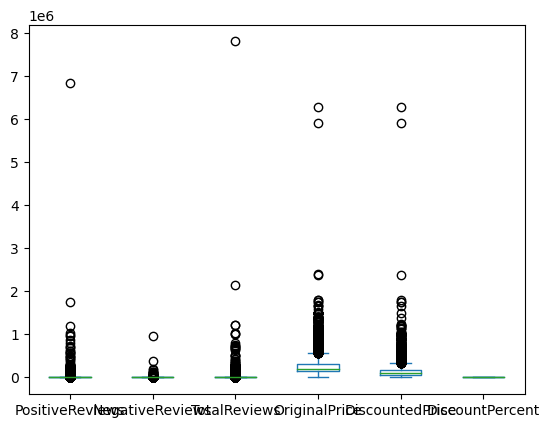

In [30]:
plt.figure(figsize=(40,90))
df[['PositiveReviews', 'NegativeReviews', 'TotalReviews', 'OriginalPrice', 'DiscountedPrice', 'DiscountPercent']].plot(kind='box')
plt.show()

Ta thấy những giá trị này có một số `outliers`. Giờ ta sẽ tiến hành xóa các dòng chứa giá trị này

In [31]:
# Hàm loại bỏ giá trị ngoại lai
def outlier_detection_iqr(temp_df, feature):
    outlier_rows = []
    Q1 = np.percentile(temp_df[feature], 25)
    Q3 = np.percentile(temp_df[feature], 75)
    IQR = Q3 - Q1
    IQR_range = 1.5 * IQR
    
    return temp_df[(temp_df[feature] >= Q1 - IQR_range) & (temp_df[feature] <= Q3 + IQR_range)]

Xóa các outliers:

In [32]:
numeric_cols = ['PositiveReviews', 'NegativeReviews', 'TotalReviews', 'OriginalPrice', 'DiscountedPrice', 'DiscountPercent']
for col in numeric_cols:
    df = outlier_detection_iqr(df, col)
df.reset_index(inplace=True, drop=True)

### Kiểm tra xem có bao nhiêu thể loại (Genre) từ những game ta đọc được?
- Việc này sẽ giúp ta lựa chọn kiểu encoding cho các dữ liệu categorical một cách hợp lí.

Trước hết ta sẽ kiểm tra xem những giá trị unique trong `Genre`:

In [33]:
def get_unique_values(feature):
    temp = df[feature]
    feature_as_str = ', '.join(temp).split(', ')
    feature_as_str = set(feature_as_str)
    return len(feature_as_str)

Lấy số lượng các unique `Genre`: 

In [34]:
unique_genres = get_unique_values('Genre')
print(f'Số lượng unique genre: {unique_genres}')

Số lượng unique genre: 22


Ta thử kiểm tra xem những genre được phân bố như thế nào:

In [35]:
def get_distributed_cat(feature):
    temp = df[feature]
    feature_as_str = ', '.join(temp).split(', ')
    distributed_dict = {}
    
    for index, item in temp.items():
        
        for element in item.split(', '):
            if element in distributed_dict:
                # If this tag already existed in the dictionary, increase the count
                distributed_dict[element] += 1
            else:
                # Else add the tag in the dictionary with count 1
                distributed_dict[element] = 1
        
    return distributed_dict

{'Indie': 2538, 'Adventure': 1823, 'Action': 1651, 'Simulation': 1159, 'Casual': 1150, 'RPG': 1073, 'Strategy': 1045, 'Early Access': 504, 'Free to Play': 173, 'Sports': 158, 'Racing': 140, 'Massively Multiplayer': 122, 'Utilities': 41, 'Animation & Modeling': 19, 'Design & Illustration': 18, 'Game Development': 11, 'Video Production': 8, 'Education': 7, 'Audio Production': 6, 'Web Publishing': 6, 'Software Training': 6, 'Photo Editing': 4}


<Axes: title={'center': 'Phân bố genre'}>

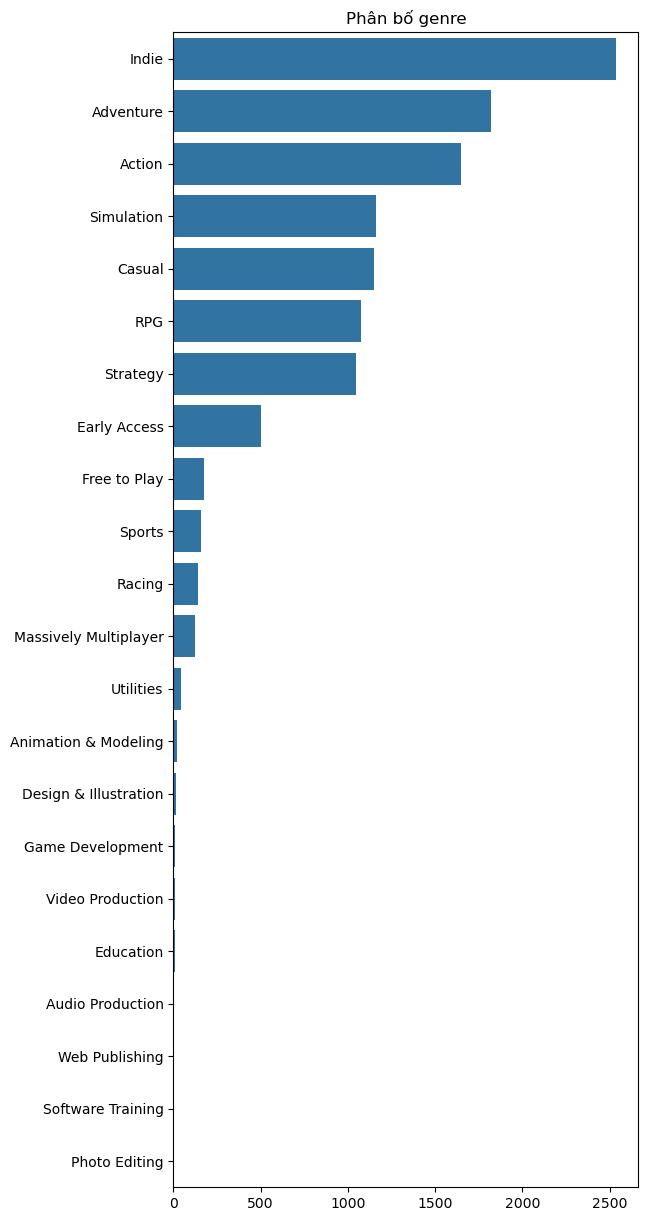

In [36]:
distributed_genre = get_distributed_cat('Genre')
distributed_genre = dict(sorted(distributed_genre.items(), key=lambda item: item[1],reverse=True))
print(distributed_genre)
f, ax = plt.subplots(figsize=(6, 15))
plt.title("Phân bố genre")
sns.barplot(x=list(distributed_genre.values()), y=list(distributed_genre.keys()), ax=ax)

Nhìn trên biểu đồ, ta thấy số lượng game có genre là `Indie` chiếm rất nhiều, trong khi đó một số genre chỉ được chỉ có trong 1 game mà chúng ta đã thu thập.

Tiếp theo ta thử kiểm tra số lượng các `Tags` như thế nào:

In [37]:
unique_tags = get_unique_values('Tags')
print(f'Số lượng unique tag: {unique_tags}')

Số lượng unique tag: 443


Số lượng tag là 358, quá nhiều để thể hiện lên trên biểu đồ. Do đó ta sẽ chỉ lấy những tag có phân bố lớn nhất (khoảng 20) để vẽ biểu đồ:

<Axes: title={'center': 'Phân bố tag'}>

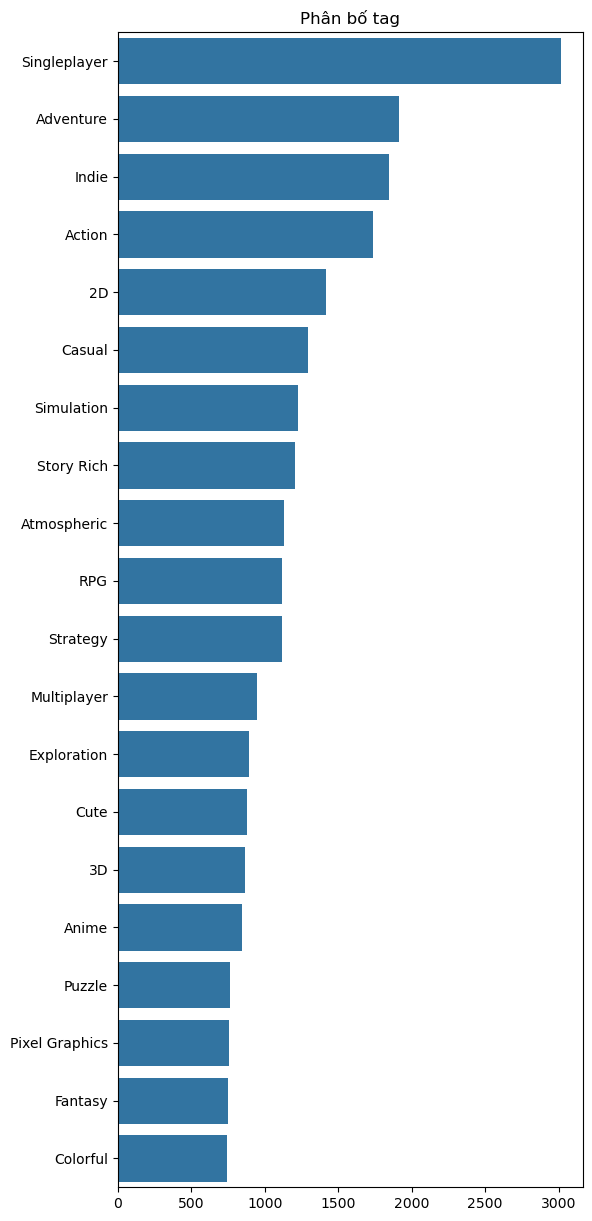

In [38]:
distributed_tag = get_distributed_cat('Tags')
distributed_tag = dict(sorted(distributed_tag.items(), key=lambda item: item[1], reverse=True))
# print(distributed_tag)
f, ax = plt.subplots(figsize=(6, 15))
plt.title("Phân bố tag")
sns.barplot(x=list(distributed_tag.values())[:20], y=list(distributed_tag.keys())[:20], ax=ax)

Theo như quan sát và tìm hiểu, thì `Genre` được phân loại theo đặc trưng chính và tổng quát của game, còn `Tags` là phân loại theo các yếu tố, nội dung trong game một cách chi tiết hơn.\
Hơn nữa do số lượng tag quá lớn có thể dẫn đến khó encode và ảnh hưởng đến hiệu năng của mô hình, ta nên drop nó và chỉ cần giữ lại `Genre`.

In [39]:
df.drop('Tags', axis=1, inplace=True)
df

,Title,Genre,withDLC,isMature,ReleaseDate,Developer,Publisher,Languages,PositiveReviews,TotalReviews,NegativeReviews,OriginalPrice,DiscountPercent,DiscountedPrice
0,iRacing,"Massively Multiplayer, Racing, Simulation, Sports",False,False,2015-01-12,iRacing.com Motorsport Simulations,iRacing.com Motorsport Simulations,English,2906.0,3379.0,473.0,175000.0,0.66,59500.0
1,HumanitZ,"Action, Adventure, RPG, Early Access",False,False,2023-09-18,Yodubzz Studios,Freedom Games,"English, French, German, Spanish - Spain, Japa...",1480.0,1940.0,460.0,260000.0,0.20,208000.0
2,Ratopia,"Adventure, Casual, Indie, Simulation, Strategy...",True,False,2023-11-05,Cassel Games,Cassel Games,"English, Korean, Japanese, Simplified Chinese,...",1553.0,1746.0,193.0,260000.0,0.10,234000.0
3,The Exit 8,"Adventure, Indie, Simulation",False,False,2023-11-29,KOTAKE CREATE,KOTAKE CREATE,"English, Japanese",3060.0,3260.0,200.0,59000.0,0.00,59000.0
4,Mind Over Magic,"Simulation, Early Access",False,False,2023-12-14,Sparkypants,Klei Publishing,"English, Simplified Chinese",474.0,510.0,36.0,220000.0,0.10,198000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4129,The Void,"Action, Adventure",True,True,2016-12-07,Ice-Pick Lodge,Ice-Pick Lodge,"English, German, Polish, Russian",835.0,1030.0,195.0,120000.0,0.70,36000.0
4130,G-senjou no Maou - The Devil on G-String,"Adventure, Casual, Simulation",True,True,2015-11-05,AKABEiSOFT2,Sekai Project,"English, Japanese",593.0,639.0,46.0,260000.0,0.50,130000.0
4131,Midnight Girl,"Adventure, Casual, Indie",False,False,2023-10-06,Italic,Italic,English,68.0,72.0,4.0,205000.0,0.15,174250.0
4132,Cantata,"Indie, Simulation, Strategy",True,False,2023-08-15,Afterschool Studio,Modern Wolf,English,89.0,117.0,28.0,220000.0,0.20,176000.0


### Số hóa các feature

Ở đây, ta sẽ bắt đầu số hóa các dữ liệu category, datetime và boolean để chuẩn bị cho huấn luyện mô hình

Đầu tiên là số hóa cột datetime và boolean:

In [40]:
df[['withDLC', 'isMature']] = df[['withDLC', 'isMature']].replace({True: 1, False: 0})
df['ReleaseYear'] = df['ReleaseDate'].dt.year
df['ReleaseMonth'] = df['ReleaseDate'].dt.month
df['ReleaseDay'] = df['ReleaseDate'].dt.day

Sau khi số hóa cột datetime, ta tiến hành drop cột `ReleaseDate`:

In [41]:
df.drop('ReleaseDate', axis=1, inplace=True)
df

,Title,Genre,withDLC,isMature,Developer,Publisher,Languages,PositiveReviews,TotalReviews,NegativeReviews,OriginalPrice,DiscountPercent,DiscountedPrice,ReleaseYear,ReleaseMonth,ReleaseDay
0,iRacing,"Massively Multiplayer, Racing, Simulation, Sports",0,0,iRacing.com Motorsport Simulations,iRacing.com Motorsport Simulations,English,2906.0,3379.0,473.0,175000.0,0.66,59500.0,2015,1,12
1,HumanitZ,"Action, Adventure, RPG, Early Access",0,0,Yodubzz Studios,Freedom Games,"English, French, German, Spanish - Spain, Japa...",1480.0,1940.0,460.0,260000.0,0.20,208000.0,2023,9,18
2,Ratopia,"Adventure, Casual, Indie, Simulation, Strategy...",1,0,Cassel Games,Cassel Games,"English, Korean, Japanese, Simplified Chinese,...",1553.0,1746.0,193.0,260000.0,0.10,234000.0,2023,11,5
3,The Exit 8,"Adventure, Indie, Simulation",0,0,KOTAKE CREATE,KOTAKE CREATE,"English, Japanese",3060.0,3260.0,200.0,59000.0,0.00,59000.0,2023,11,29
4,Mind Over Magic,"Simulation, Early Access",0,0,Sparkypants,Klei Publishing,"English, Simplified Chinese",474.0,510.0,36.0,220000.0,0.10,198000.0,2023,12,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4129,The Void,"Action, Adventure",1,1,Ice-Pick Lodge,Ice-Pick Lodge,"English, German, Polish, Russian",835.0,1030.0,195.0,120000.0,0.70,36000.0,2016,12,7
4130,G-senjou no Maou - The Devil on G-String,"Adventure, Casual, Simulation",1,1,AKABEiSOFT2,Sekai Project,"English, Japanese",593.0,639.0,46.0,260000.0,0.50,130000.0,2015,11,5
4131,Midnight Girl,"Adventure, Casual, Indie",0,0,Italic,Italic,English,68.0,72.0,4.0,205000.0,0.15,174250.0,2023,10,6
4132,Cantata,"Indie, Simulation, Strategy",1,0,Afterschool Studio,Modern Wolf,English,89.0,117.0,28.0,220000.0,0.20,176000.0,2023,8,15


Kiểm tra những ngôn ngữ phổ biến trong game:

<Axes: title={'center': 'Tính phân bố các ngôn ngữ trong dữ liệu'}>

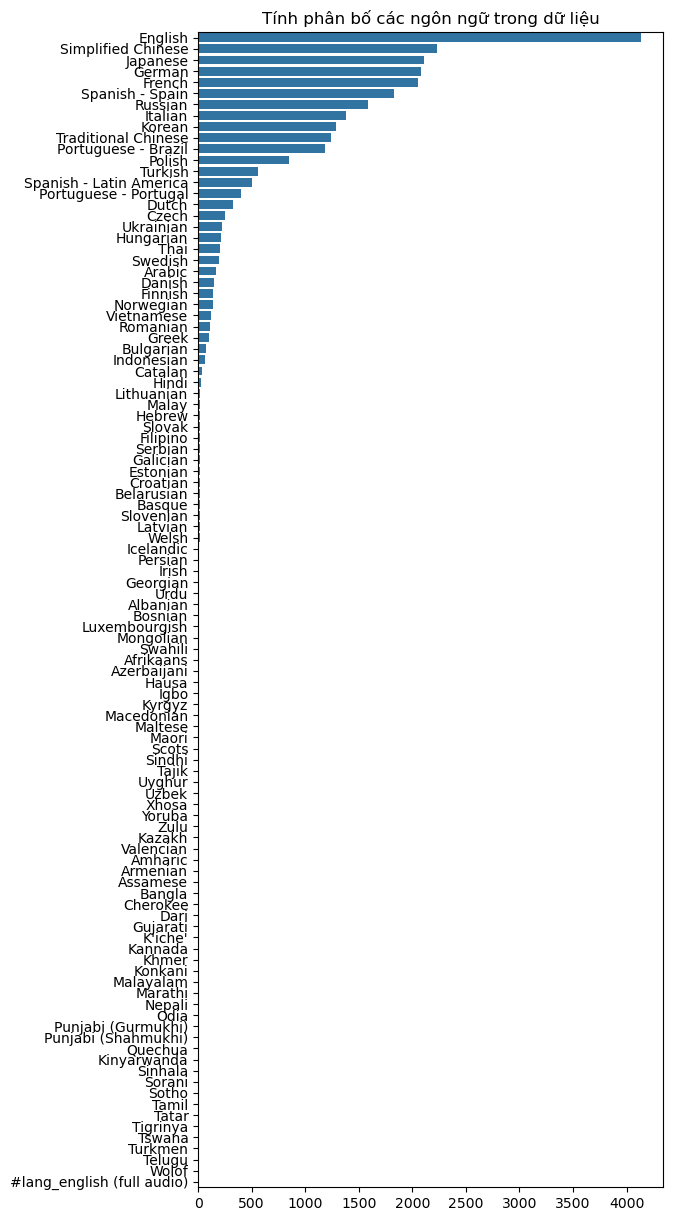

In [42]:
distributed_lan = get_distributed_cat('Languages')
distributed_lan = dict(sorted(distributed_lan.items(), key=lambda item: item[1], reverse=True))
# print(distributed_tag)
f, ax = plt.subplots(figsize=(6, 15))
plt.title("Tính phân bố các ngôn ngữ trong dữ liệu")
sns.barplot(x=list(distributed_lan.values()), y=list(distributed_lan.keys()), ax=ax)

Như ta thấy, `English` vẫn là ngôn ngữ chính trong hầu hết các game, và hầu hết người chơi nếu không có ngôn ngữ bản địa sẽ sử dụng `English` là chủ yếu, và nếu không có `English` hay ngôn ngữ bản địa của họ, sẽ khó để game đó có thể tiếp cận đến người dùng, ảnh hưởng đến đánh giá của game.\
Do đó, ta có thể chỉ cần tạo một cột kiểm tra xem có ngôn ngữ `English` hay không:

In [43]:
df['HasEnglish'] = df['Languages'].apply(lambda x: 1 if 'English' in x.split(', ') else 0)
df.drop('Languages', axis=1, inplace=True)
df

,Title,Genre,withDLC,isMature,Developer,Publisher,PositiveReviews,TotalReviews,NegativeReviews,OriginalPrice,DiscountPercent,DiscountedPrice,ReleaseYear,ReleaseMonth,ReleaseDay,HasEnglish
0,iRacing,"Massively Multiplayer, Racing, Simulation, Sports",0,0,iRacing.com Motorsport Simulations,iRacing.com Motorsport Simulations,2906.0,3379.0,473.0,175000.0,0.66,59500.0,2015,1,12,1
1,HumanitZ,"Action, Adventure, RPG, Early Access",0,0,Yodubzz Studios,Freedom Games,1480.0,1940.0,460.0,260000.0,0.20,208000.0,2023,9,18,1
2,Ratopia,"Adventure, Casual, Indie, Simulation, Strategy...",1,0,Cassel Games,Cassel Games,1553.0,1746.0,193.0,260000.0,0.10,234000.0,2023,11,5,1
3,The Exit 8,"Adventure, Indie, Simulation",0,0,KOTAKE CREATE,KOTAKE CREATE,3060.0,3260.0,200.0,59000.0,0.00,59000.0,2023,11,29,1
4,Mind Over Magic,"Simulation, Early Access",0,0,Sparkypants,Klei Publishing,474.0,510.0,36.0,220000.0,0.10,198000.0,2023,12,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4129,The Void,"Action, Adventure",1,1,Ice-Pick Lodge,Ice-Pick Lodge,835.0,1030.0,195.0,120000.0,0.70,36000.0,2016,12,7,1
4130,G-senjou no Maou - The Devil on G-String,"Adventure, Casual, Simulation",1,1,AKABEiSOFT2,Sekai Project,593.0,639.0,46.0,260000.0,0.50,130000.0,2015,11,5,1
4131,Midnight Girl,"Adventure, Casual, Indie",0,0,Italic,Italic,68.0,72.0,4.0,205000.0,0.15,174250.0,2023,10,6,1
4132,Cantata,"Indie, Simulation, Strategy",1,0,Afterschool Studio,Modern Wolf,89.0,117.0,28.0,220000.0,0.20,176000.0,2023,8,15,1


Kiểm tra xem cột `HasEnglish` có giá trị khác 1 không:

In [44]:
df[df['HasEnglish'] != 1]

,Title,Genre,withDLC,isMature,Developer,Publisher,PositiveReviews,TotalReviews,NegativeReviews,OriginalPrice,DiscountPercent,DiscountedPrice,ReleaseYear,ReleaseMonth,ReleaseDay,HasEnglish


Không có game nào là không có `English`, Do đó cột này không có giá trị gì để tính điểm.\
Ta sẽ loại bỏ cột này:

In [45]:
df.drop('HasEnglish', axis=1, inplace=True)
df

,Title,Genre,withDLC,isMature,Developer,Publisher,PositiveReviews,TotalReviews,NegativeReviews,OriginalPrice,DiscountPercent,DiscountedPrice,ReleaseYear,ReleaseMonth,ReleaseDay
0,iRacing,"Massively Multiplayer, Racing, Simulation, Sports",0,0,iRacing.com Motorsport Simulations,iRacing.com Motorsport Simulations,2906.0,3379.0,473.0,175000.0,0.66,59500.0,2015,1,12
1,HumanitZ,"Action, Adventure, RPG, Early Access",0,0,Yodubzz Studios,Freedom Games,1480.0,1940.0,460.0,260000.0,0.20,208000.0,2023,9,18
2,Ratopia,"Adventure, Casual, Indie, Simulation, Strategy...",1,0,Cassel Games,Cassel Games,1553.0,1746.0,193.0,260000.0,0.10,234000.0,2023,11,5
3,The Exit 8,"Adventure, Indie, Simulation",0,0,KOTAKE CREATE,KOTAKE CREATE,3060.0,3260.0,200.0,59000.0,0.00,59000.0,2023,11,29
4,Mind Over Magic,"Simulation, Early Access",0,0,Sparkypants,Klei Publishing,474.0,510.0,36.0,220000.0,0.10,198000.0,2023,12,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4129,The Void,"Action, Adventure",1,1,Ice-Pick Lodge,Ice-Pick Lodge,835.0,1030.0,195.0,120000.0,0.70,36000.0,2016,12,7
4130,G-senjou no Maou - The Devil on G-String,"Adventure, Casual, Simulation",1,1,AKABEiSOFT2,Sekai Project,593.0,639.0,46.0,260000.0,0.50,130000.0,2015,11,5
4131,Midnight Girl,"Adventure, Casual, Indie",0,0,Italic,Italic,68.0,72.0,4.0,205000.0,0.15,174250.0,2023,10,6
4132,Cantata,"Indie, Simulation, Strategy",1,0,Afterschool Studio,Modern Wolf,89.0,117.0,28.0,220000.0,0.20,176000.0,2023,8,15


Ta thấy hai đường hồi quy phân loại theo `withDLC` và `isMature` trên mỗi hình sát nhau và gần như là một, do đó những game có **DLC** hay game có **Mature content** không ảnh hưởng quá nhiều khi người chơi đánh giá game.

### Tạo cột tính điểm cho game

##### Ta sẽ sử dụng công thức sau để tính score_rating cho từng trò chơi điện tử dựa trên giá trị ở các cột Reviews với miền giá trị sau khi tính sẽ là [0, 1]
- Total Reviews = Positive Reviews + Negative Reviews
- Review Score = Positive Reviews / Total Reviews
- $$Rating = Review Score - (Review Score - 0.5)*2^{-log_{10}(Total Reviews + 1)}$$


Một số lý do để sử dụng công thức này:
1. Tập trung vào các phản hồi tích cực, có nghĩa là mỗi phản hồi tích cực có tác động lớn hơn trên score_rating so với phản hồi tiêu cực
2. Mặc dù công thức tập trung và nhấn mạnh phản hồi tích cực nhưng không bỏ qua bất kì phản hồi tiêu cực nào
3. Có sự cân bằng khi ta cân nhắc phản hổi tích cực thật sự quan trọng hơn nhưng phản hồi tiêu cực cũng có ảnh hưởng nhất định

In [46]:
ReviewScore = df['PositiveReviews'] / df['TotalReviews']
df['Rating'] = ReviewScore - (ReviewScore - 0.5) * pow(2, -np.log10(df['TotalReviews'] + 1))
df

,Title,Genre,withDLC,isMature,Developer,Publisher,PositiveReviews,TotalReviews,NegativeReviews,OriginalPrice,DiscountPercent,DiscountedPrice,ReleaseYear,ReleaseMonth,ReleaseDay,Rating
0,iRacing,"Massively Multiplayer, Racing, Simulation, Sports",0,0,iRacing.com Motorsport Simulations,iRacing.com Motorsport Simulations,2906.0,3379.0,473.0,175000.0,0.66,59500.0,2015,1,12,0.828828
1,HumanitZ,"Action, Adventure, RPG, Early Access",0,0,Yodubzz Studios,Freedom Games,1480.0,1940.0,460.0,260000.0,0.20,208000.0,2023,9,18,0.735973
2,Ratopia,"Adventure, Casual, Indie, Simulation, Strategy...",1,0,Cassel Games,Cassel Games,1553.0,1746.0,193.0,260000.0,0.10,234000.0,2023,11,5,0.848305
3,The Exit 8,"Adventure, Indie, Simulation",0,0,KOTAKE CREATE,KOTAKE CREATE,3060.0,3260.0,200.0,59000.0,0.00,59000.0,2023,11,29,0.900236
4,Mind Over Magic,"Simulation, Early Access",0,0,Sparkypants,Klei Publishing,474.0,510.0,36.0,220000.0,0.10,198000.0,2023,12,14,0.863713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4129,The Void,"Action, Adventure",1,1,Ice-Pick Lodge,Ice-Pick Lodge,835.0,1030.0,195.0,120000.0,0.70,36000.0,2016,12,7,0.772200
4130,G-senjou no Maou - The Devil on G-String,"Adventure, Casual, Simulation",1,1,AKABEiSOFT2,Sekai Project,593.0,639.0,46.0,260000.0,0.50,130000.0,2015,11,5,0.866818
4131,Midnight Girl,"Adventure, Casual, Indie",0,0,Italic,Italic,68.0,72.0,4.0,205000.0,0.15,174250.0,2023,10,6,0.822292
4132,Cantata,"Indie, Simulation, Strategy",1,0,Afterschool Studio,Modern Wolf,89.0,117.0,28.0,220000.0,0.20,176000.0,2023,8,15,0.698680


**Tiền xử lí hoàn tất, ta xuất dữ liệu ra một file mới chuẩn bị cho giai đoạn học máy:**

In [47]:
df.to_csv('../data/processed_data.csv', index=False)